# Problem Set # 4

### MACS 30100,  Dr. Evans

### Name : Zunda Xu ( zunda@uchicago.edu )

We first import the packages and some functions used in the problem set.

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
import scipy.stats as stats
import sklearn as sk
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

/Users/winston/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/winston/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Problem 1: Multiple Linear Regression

#### Part ( a ) : Import the data and replace the missing value

In [3]:
# Import the data using pandas.read_csv function and replace the missing value
auto_df = pd.read_csv("auto.csv", na_values = "?")
# show the top 10 data of the dataframe
auto_df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


#### Part ( b ) : Plot a scatterplot matrix

The scatterplot matrix including all of the quantitative variables is as follows:

<IPython.core.display.Javascript object>


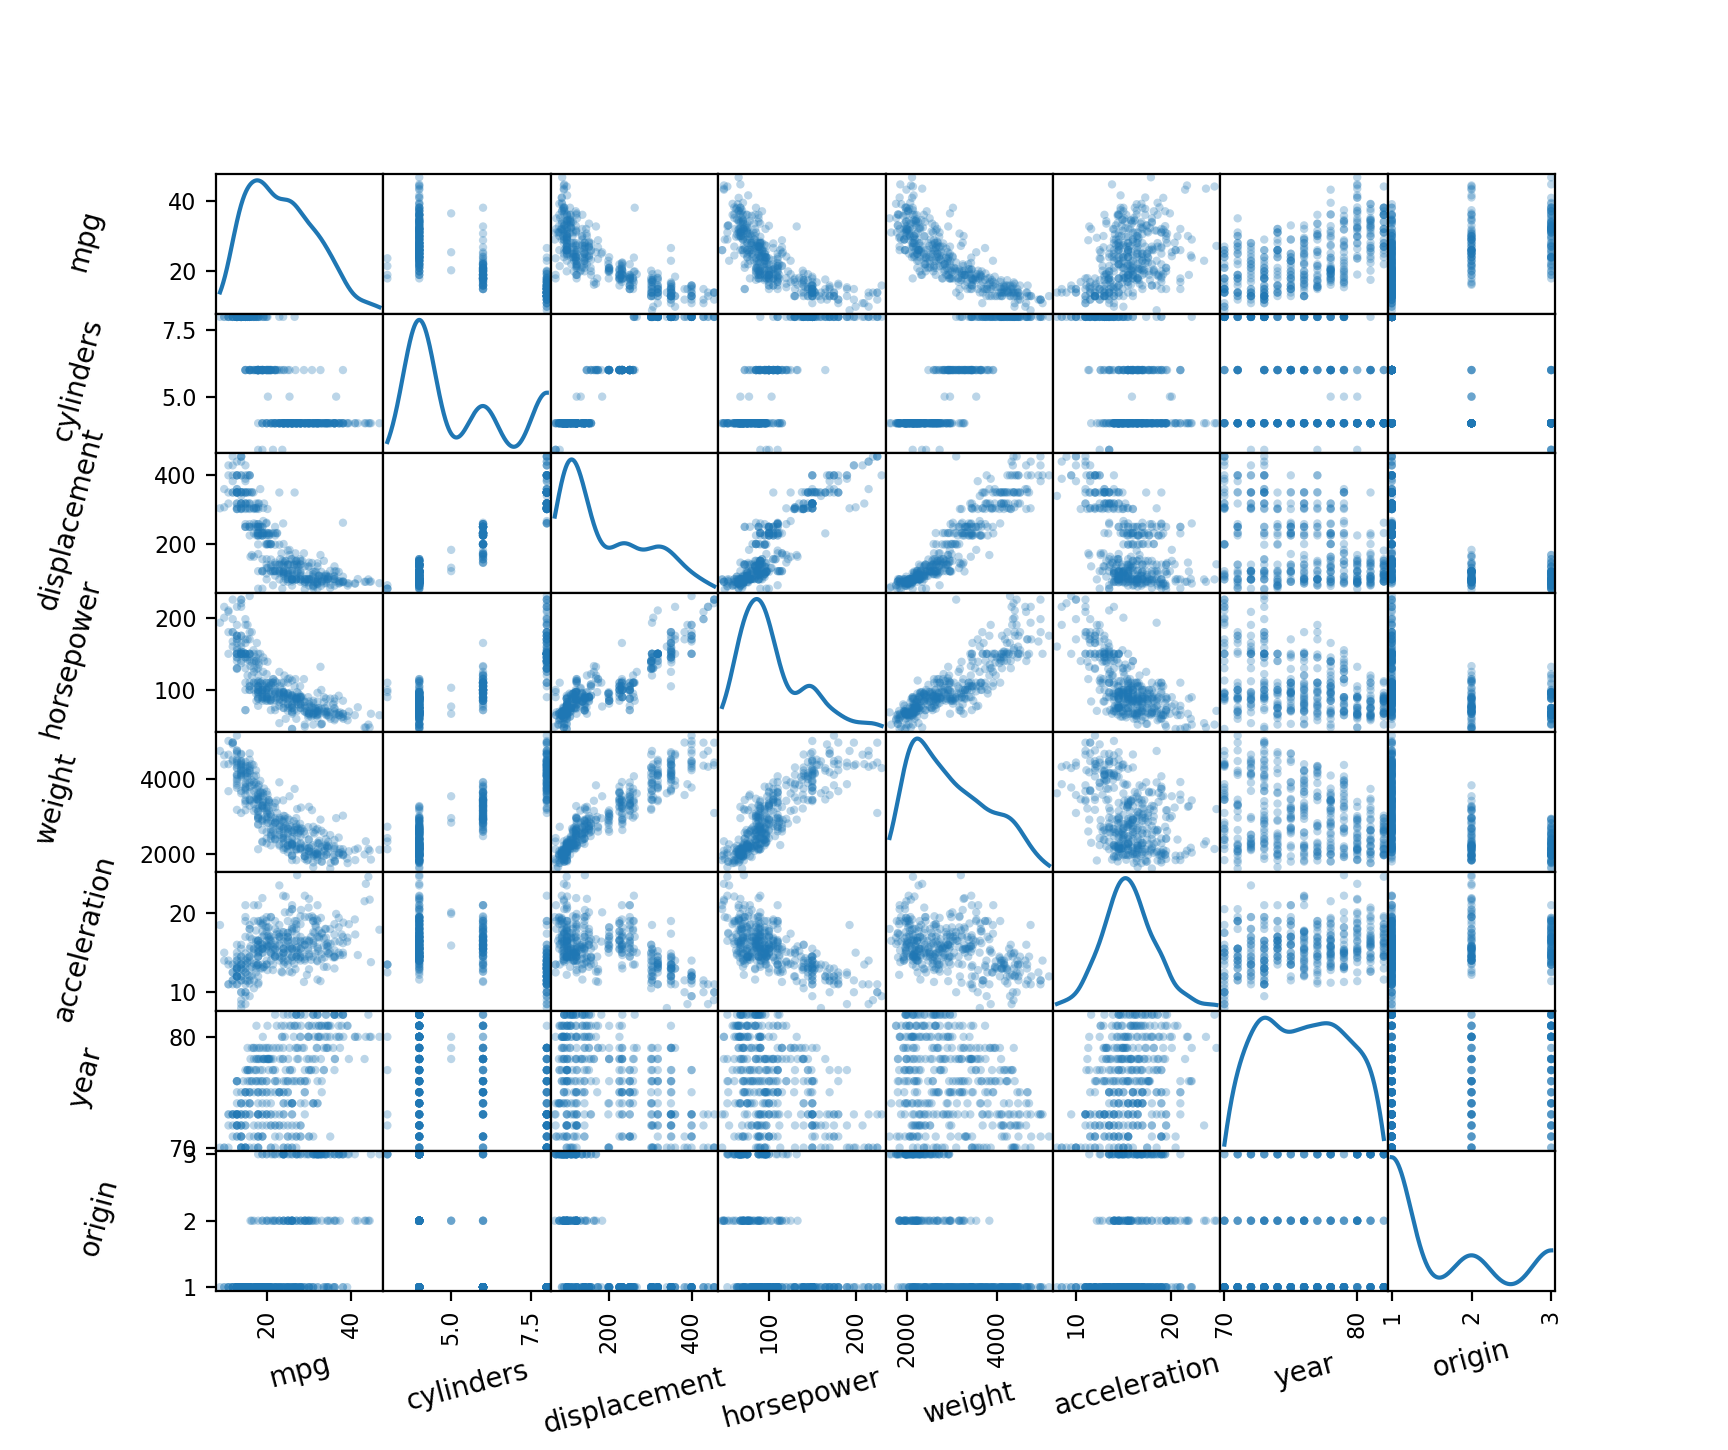

In [3]:
%matplotlib notebook
axs = scatter_matrix(auto_df, alpha = 0.3, figsize = (6,6), diagonal = 'kde')
n = len(auto_df.columns)
for x in range(n-1):
    for y in range(n-1):
        ax = axs[x, y]
        ax.xaxis.label.set_rotation(15)
        ax.yaxis.label.set_rotation(75)
        ax.yaxis.labelpad = 25

#### Part ( c ) : Compute the correlation matrix for the quantitative variables.

The correlation matrix for the quantitative variables is as follows:

In [5]:
auto_df.corr('pearson')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


#### Part ( d ) Estimate the multiple linear regression model of mpg on all other quantitative variables

In [6]:
# Add a column of constant 1's to our dataset
auto_df['const'] = 1

In [7]:
# Using OLS function to estimate the multiple linear regression model
reg1 = sm.OLS(endog = auto_df['mpg'], exog = auto_df[['const','cylinders','displacement','horsepower','weight',
                                                     'acceleration','year','origin']], missing = 'drop')
results1 = reg1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 03 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        22:25:34   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

##### ( i )  Which of the coefficient is statistically significant at the 1% level ?

Answer : **$\beta_{2}$ (displacement)**, **$\beta_{4}$ (weight)**, **$\beta_{6}$ (year)**, and **$\beta_{7}$ (origin)** are statistically significant at the 1% level.

##### ( ii )  Which of the coefficient is  NOT statistically significant at the 1% level ?

Answer : **$\beta_{1}$ (cylinders)**, **$\beta_{3}$ (horsepower)** and **$\beta_{5}$ (acceleration)** are not statistically significant at the 10% level.

##### ( iii )  Given an interpretion of the estimated parameters $\beta_{6}$

Answer : When keeping other variables unchanged, **one unit change in the variable year** (increase or decrease 1 year) will result in a corresponding **0.7508 unit change in mpg **(increase or decrease 0.7508 miles per gallon)

#### Part ( e ) : The three variables that look most likely to have a nonlinear realationship with mpg.

From the scatterplot, **displacement**, **horsepower** and **weight** are three variables that look most likely to have a nonlinear relationship with **mpg**.

##### ( i ) : Estimate a new multiple linear regression model  including squared terms.

In [8]:
variables = ['displacement','horsepower', 'weight', 'acceleration']
# Add squared terms of the four variables in the dataframe
for var in variables:
    name = var + "_sqr"
    auto_df[name] = auto_df[var].apply(lambda x: x ** 2)
reg2 = sm.OLS(endog = auto_df['mpg'], exog = auto_df[['const','cylinders','displacement','horsepower','weight',
                                                     'acceleration','year','origin','displacement_sqr','horsepower_sqr',
                                                     'weight_sqr', 'acceleration_sqr']], missing = 'drop')
results2 = reg2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sat, 03 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        22:25:38   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               20.1084      6.696  

##### ( ii ) . Report the adjusted R-squared statistics and compared with the R-squared statistics from part ( d ).

In [9]:
print("adjusted R-squared value of the new regression model is:", results2.rsquared_adj)
print("adjusted R-squared value of the regression model from part(d) is:", results1.rsquared_adj)

adjusted R-squared value of the new regression model is: 0.865748356979
adjusted R-squared value of the regression model from part(d) is: 0.818223770584


From the results above, we know that the adjusted R-squared of the new regression model is **better than** the adjusted R-squared value from the part (d).

##### ( iii ) The statistical significance of the displacement and its squared term.

The p-value of the variable displacement become larger and change from 0.008 to 0.408, which means in the second regression model, the coefficient of variable displacement is not statistically significant at the 10% level, while in the first regression model, its coefficient is statistically significant at the 1% level.

The p-value of its squared term is 0.532, which also means the coefficient of its squared term is not statistically significant at the 10% level.

##### ( iv ) The statistical significance of the cylinders

The p-value of the variable cylinders changes from 0.128 to 0.440, which is still not statistically significant at the 10% level.

#### Part ( e ) : Predict the mpg value .

In [10]:
pred_mpg = results2.predict(exog=[1, 6, 200, 100, 3100, 15.1, 99, 1, 200 ** 2, 100 ** 2, 3100 ** 2, 15.1 ** 2])

In [11]:
print("The predicted miles per gallon is around:",pred_mpg[0].round(3))

The predicted miles per gallon is around: 38.732


### Problem 2 :  Classification problem: KNN by hand and in python.

#### Part ( a ) : Compute the Euclidean distance between each observation and the test point

First of all, we construct the dataframe for the observations

In [12]:
# Construct the DataFrame for the observations
table = {'x1':[0, 2, 0, 0, -1, 1],
         'x2':[3, 0, 1, 1, 0, 1],
         'x3':[0, 0, 3, 2, 1, 1],
         'y':['R','R','R','G','G','R']}
KNN_df = pd.DataFrame(data = table)
KNN_df

,x1,x2,x3,y
0,0,3,0,R
1,2,0,0,R
2,0,1,3,R
3,0,1,2,G
4,-1,0,1,G
5,1,1,1,R


Then we give value to the test point, and compute the Euclidean distance between the obaservations and the test point, the results are as follows:

In [13]:
# Test point
x1 = 0
x2 = 0
x3 = 0

# Compute the Euclidean distance between observations and the test point
Eucl_dist = np.sqrt((KNN_df['x1'] - x1) ** 2 + (KNN_df['x2'] - x2) ** 2 + (KNN_df['x3'] - x3) ** 2)
KNN_df['eucl_dist'] = Eucl_dist
KNN_df

,x1,x2,x3,y,eucl_dist
0,0,3,0,R,3.000000
1,2,0,0,R,2.000000
2,0,1,3,R,3.162278
3,0,1,2,G,2.236068
4,-1,0,1,G,1.414214
5,1,1,1,R,1.732051


#### Part ( b ) :  The KNN  prediction with  K = 1.

Answer : When k = 1, we will consider a single nearest neighbour to the point (0, 0, 0). According to the table shown above, we find that the **observation 5 (index : 4, x1 = -1, x2 = 0, x3 = 1, eucl_dist : 1.414214) ** has the shortest euclidean distance to the point (0, 0, 0), so we predict Y to be **green**.

#### Part ( c ) : The KNN prediction with K = 3

In [14]:
# Sort the observation by the Eculidean distance to find out the three shortest distance between observations and 
# the test point.
KNN_df_sorted = KNN_df.sort_values(by = ['eucl_dist'])
KNN_df_sorted

,x1,x2,x3,y,eucl_dist
4,-1,0,1,G,1.414214
5,1,1,1,R,1.732051
1,2,0,0,R,2.000000
3,0,1,2,G,2.236068
0,0,3,0,R,3.000000
2,0,1,3,R,3.162278


Answer : When k = 3, we will consider the three nearest neighbours to the point (0, 0, 0). According to the table shown above, we find that the three nearst neighbours to the point (0, 0, 0) are:

**observation 5 (index:4, x1 = -1, x2 = 0, x3 = 1, eucl_dist: 1.414)**, 

**observation 6 (index:5, x1 = 1, x2 = 1, x3 = 1, eucl_dist: 1.732)**,

**observation 2 (index:1, x1 = 2, x2 = 0, x3 = 0, eucl_dist: 2.000)** 

since two of the y-value in these three observations are "Red", and only one y-value of these three observations are "Green", thus we predict Y to be **Red** when k = 3.

#### Part ( d ) :  

Answer : If the Bayes decision boundary in this problem is highly non-linear, a **smaller value of K** would be better, since it will better fits a non-linear decision boundary that has high variance but lower bias. And also as K gets larger, the pattern produced will become more linear.

#### Part ( e ) : Estimate the KNN classifier of the test point .

In [15]:
# Using prediction method 
y = KNN_df['y']
x = np.column_stack((KNN_df['x1'], KNN_df['x2'], KNN_df['x3']))
KNN_classifier = sk.neighbors.KNeighborsClassifier(n_neighbors=2)
results3 = KNN_classifier.fit(x, y)
print(results3.predict([(1, 1, 1)]))
print('')
# Using kneighbors function to find the estimated KNN classifier
print(KNN_classifier.kneighbors([(1, 1, 1)]))

['G']

(array([[ 0.        ,  1.41421356]]), array([[5, 3]]))


Answer : According to the predict method, the estimated y-value for the point(1, 1, 1) is **'Green'**. And according to the kneighbors function, we get the results that the two nearest neighbors of the test point (1, 1, 1) are Observation 6 ( x1 = 1, x2 =1, x3 = 1, eucl_dist = 0) and Observation 4 ( x1 = 0, x2 = 1, x3 = 2, eucl_dist = 1.414).

### Problem 3 : Multivariable Logistic Regression

#### Part ( a ) : Estimate the logistic regression of mpg_high

First of all, we add the binary variable of mpg_high into the dataset.

In [10]:
auto_df1 = auto_df.iloc[:, 0:10]
criterion = auto_df1['mpg'].median()
def binary_mpg(mpg):
    if mpg >= criterion:
        mpg_high = 1
    else:
        mpg_high = 0
    return mpg_high

auto_df1["mpg_high"] = auto_df1["mpg"].apply(binary_mpg)
auto_df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,const,mpg_high
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,1,0


Next, we start estimating the Logistic model, and the result is as follows:

In [11]:
X = ["const","cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"]
LogitModel = sm.Logit(endog = auto_df1["mpg_high"], exog = auto_df1[X], missing = 'drop')
result_logit = LogitModel.fit()
result_logit.summary()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sat, 03 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        22:26:09   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626      0.423     -0.384      0.701      -0.992       0.667
displacement     0.0021      0.012      0.174      0.862      -0.021       0.026
horsepower      -0.0410      0.024     -1.718      0.086      -0.088       0.006
weight          -0.0043      0.001     -3.784      0.000      -0.007      -0.002
acceleration     0.0161      0.141      0.114      0.910      -0.261       0.293
year             0.4295      0.075      5.709      0.000       0.282       0.577
origin           0.4773      0.362      1.319      0.187      -0.232       1.187
================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

According to the result summary shown above, the coefficients of variables **weight ( p-value = 0.00)** and **year ( p-value = 0.00)** are statistically significant at the 5% level

#### Part ( b ) : Divide the data into training data and test data

In [12]:
auto_df1 = auto_df1.dropna(axis = 0, how = 'any')
np_x = np.column_stack((auto_df1['const'], auto_df1['cylinders'], auto_df1['displacement'], auto_df1['horsepower'], auto_df1['weight'], 
                     auto_df1['acceleration'], auto_df1['year'], auto_df1['origin']))
# Divide the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(np_x, auto_df1['mpg_high'], test_size = 0.5, random_state=10)

#### Part ( c ) : Estimate the model using training data

The estimation result is as follows:

In [13]:
LogReg = LogisticRegression()
results_logit2 = LogReg.fit(X_train, y_train)
results_logit2.coef_

array([[-0.07466047, -0.71249839,  0.00668346, -0.03671267, -0.00506612,
        -0.13159781,  0.29928275, -0.15897653]])

According to the result shown above, my estimated intercept  ** $\beta_{0}$ = -0.075** , and coefficients are ** $\beta_{1}$ = -0.712**, ** $\beta_{2}$ = 0.0067 **, ** $\beta_{3}$ = -0.037**, ** $\beta_{4}$ = -0.005**,** $\beta_{5}$ = -0.131**,** $\beta_{6}$ = 0.299** and ** $\beta_{7}$ = -0.159**

#### Part ( d ) : Create predicted value of mpg_high using test data 

We use predict function and test data to predict the value of mpg_high, and compute the comfusion matrix, the result is as follows:

In [14]:
y_pred = LogReg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[86, 13],
       [12, 85]])

Then we calculate the classification report as follows:

In [15]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



Given the precision reported above, we find that the model predicts low_mpg slightly (88% precision ) better than high_mpg (87% precision).